In [1023]:
import pandas as pd
import numpy as np

In [1024]:
df_train = pd.read_excel(r"C:\Users\AMITHK\Downloads\Data Trained\Projects\Week 2\Doctor's Consultation Fees Prediction\Final Participant Data Folder\Final_Train.xlsx")

df_train.head()
                        

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [1025]:
df_test = pd.read_excel(r"C:\Users\AMITHK\Downloads\Data Trained\Projects\Week 2\Doctor's Consultation Fees Prediction\Final Participant Data Folder\Final_Test.xlsx")

df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [1026]:
df_train.nunique()

Qualification         1420
Experience              64
Rating                  51
Place                  877
Profile                  6
Miscellaneous_Info    2998
Fees                    40
dtype: int64

In [1027]:
df_test.nunique()

Qualification          630
Experience              57
Rating                  36
Place                  592
Profile                  6
Miscellaneous_Info    1084
dtype: int64

In [1028]:
df_train.isnull().sum().values.sum()

5947

In [1029]:
df_train.shape

(5961, 7)

In [1030]:
df_test.isnull().sum().values.sum()

1930

In [1031]:
df_test.shape

(1987, 6)

In [1032]:
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [1033]:
df_train['Experience'] = df_train["Experience"].str.split(" ", 1, expand=True)

In [1034]:
df_train['Experience'] = df_train['Experience'].astype(int)

In [1035]:
df_train.describe()

,Experience,Fees
count,5961.000000,5961.000000
mean,17.303976,307.944640
std,11.142798,190.920373
min,0.000000,5.000000
25%,9.000000,150.000000
50%,14.000000,300.000000
75%,23.000000,500.000000
max,66.000000,950.000000


In [1036]:
df_train[df_train['Rating'].isnull()]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
5,BAMS,8,NaN,"Porur, Chennai",Ayurveda,NaN,100
6,BHMS,42,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200
8,"MBBS, MD - General Medicine",14,NaN,"Old City, Hyderabad",General Medicine,NaN,100
...,...,...,...,...,...,...,...
5951,"BDS, certification in smile designing",4,NaN,"HAL, Bangalore",Dentist,Dental Restoration Restoration Aesthetics Disc...,200
5952,MBBS,47,NaN,"Bhandup West, Mumbai",General Medicine,NaN,100
5954,BHMS,31,NaN,"Adarsh Nagar, Delhi",Homeopath,NaN,300
5955,MD - Homeopathy,10,NaN,"Vijaynagar, Delhi",Homeopath,NaN,300


In [1037]:
# In place column both locality and place are given we can remove locality as the Fee depends on place only

df_train['Place'] = df_train["Place"].str.split(",").str[1]


In [1038]:
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,Bangalore,ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,Bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98%,Bangalore,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33,NaN,Chennai,General Medicine,NaN,100
5958,MBBS,41,97%,Delhi,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15,90%,Mumbai,General Medicine,General Medical Consultation Viral Fever Treat...,100


In [1039]:
df_train['Place'] = df_train['Place'].str.split(" ").str[1]

In [1040]:
df_train['Place'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Sector                   1
Name: Place, dtype: int64

In [1041]:
df_train[df_train['Place']=='Sector']

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
2169,BDS,11,NaN,Sector,Dentist,NaN,250


In [1042]:
df_train['Place'].iloc[2169] = 'Delhi'

C:\Users\AMITHK\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1043]:
df_train['Place'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Name: Place, dtype: int64

In [1044]:
df_train['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [1045]:
df_train['Qualification'].value_counts()

BDS                                                                         488
BHMS                                                                        477
BAMS                                                                        471
MBBS                                                                        334
MBBS, MS - ENT                                                              220
                                                                           ... 
BHMS, MBA                                                                     1
FRGUHS, MBBS, MD - Dermatology , Venereology & Leprosy                        1
BAMS, MS - Counselling and Psychotherapy, DNHE, Bachelor of Chiropractic      1
BHMS, BPTh/BPT, MSc - Psychotherapy And Counselling                           1
BDS, Post Graduate Diploma in Orthodontics                                    1
Name: Qualification, Length: 1420, dtype: int64

In [1046]:
# After trial and error these qualification are found to be occuring mostly
Qualifications = ['BAMS','BHMS','MDS','BDS',' MD','MS -','MBBS','DNB','DHMS','MD -']

In [1047]:
for j in Qualifications:
    df_train.loc[df_train['Qualification'].str.contains(j), 'Qualification'] = j

In [1048]:
df_train['Qualification'].value_counts()

MBBS                                                                                                                                                                                                                                                                                                                                                                         1324
 MD                                                                                                                                                                                                                                                                                                                                                                           962
BAMS                                                                                                                                                                                                                                                                

In [1049]:
df_train.loc[df_train['Qualification'].str.contains('BEMS'), 'Qualification'] = 'BAMS'
df_train.loc[df_train['Qualification'].str.contains('BSAM'), 'Qualification'] = 'BAMS'
df_train.loc[df_train['Qualification'].str.contains('BIMS'), 'Qualification'] = 'BHMS'
df_train.loc[df_train['Qualification'].str.contains('Diploma'), 'Qualification'] = 'Diploma'
# All the persons having below qualification are dentist, so I am making their Qualification as BDS
df_train.loc[df_train['Qualification'].str.contains('Get inspired by remarkable stories of people like you'), 'Qualification'] = 'BDS'
df_train.loc[df_train['Qualification'].str.contains('GCEH'), 'Qualification'] = 'GCEH'
df_train.loc[df_train['Qualification'].str.contains('Dental'), 'Qualification'] = 'BDS'
df_train.loc[df_train['Qualification'].str.contains('M.D'), 'Qualification'] = 'MD'
df_train.loc[df_train['Qualification'].str.contains('G.A'), 'Qualification'] = 'GAMS'
# DDV means Diploma in Dental and virology
df_train.loc[df_train['Qualification'].str.contains('DDV'), 'Qualification'] = 'Diploma'
df_train.loc[df_train['Qualification'].str.contains('LCEH'), 'Qualification'] = 'Homeopathy'
df_train.loc[df_train['Qualification'].str.contains('Dentofacial'), 'Qualification'] = 'MDS'
df_train.loc[df_train['Qualification'].str.contains('HMD'), 'Qualification'] = 'Homeopathy'

In [1050]:
df_train['Qualification'] = df_train['Qualification'].str.replace(" ","")
df_train['Qualification'] = df_train['Qualification'].str.replace("-","")

In [1051]:
df_train['Qualification'].value_counts()

MBBS                 1324
MD                   1060
BAMS                  769
MDS                   761
BHMS                  749
BDS                   660
MS                    565
DHMS                   35
Homeopathy             13
DNB                    12
Diploma                 7
GAMS                    3
GCEH                    2
39yearsexperience       1
Name: Qualification, dtype: int64

In [1052]:
df_train[df_train['Qualification']=='39yearsexperience']


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
753,39yearsexperience,39,NaN,Delhi,General Medicine,NaN,300


In [1053]:
df_train = df_train.drop(753)

In [1054]:
# We can see that there are some rows with no rating, if we think logically many persons do rate their doctos if and only If
#  they feel like they want to rate them to show their experience with them,if a doctor is not getting rated wither their
# patients are not highly satisfied or highly dissatisified . So we can consider 50% rating for all the null values

df_train['Rating'] = df_train['Rating'].str.replace("NaN","50")


In [1055]:
df_train['Rating'] = df_train['Rating'].str.replace("%","")


In [1056]:
df_train['Rating'] = df_train['Rating'].fillna('50').astype(int)

In [1057]:
df_train = df_train.drop(['Miscellaneous_Info'],axis=1)
df_train

,Qualification,Experience,Rating,Place,Profile,Fees
0,BHMS,24,100,Ernakulam,Homeopath,100
1,BAMS,12,98,Bangalore,Ayurveda,350
2,MS,9,50,Bangalore,ENT Specialist,300
3,BAMS,12,50,Bangalore,Ayurveda,250
4,BAMS,20,100,Chennai,Ayurveda,250
...,...,...,...,...,...,...
5956,MS,19,98,Bangalore,ENT Specialist,300
5957,MBBS,33,50,Chennai,General Medicine,100
5958,MBBS,41,97,Delhi,General Medicine,600
5959,MD,15,90,Mumbai,General Medicine,100


In [1058]:
# Following the same Steps for test dataset
# Step-1
df_test['Experience'] = df_test["Experience"].str.split(" ", 1, expand=True)
df_test['Experience'] = df_test['Experience'].astype(int)
df_test['Place'] = df_test["Place"].str.split(",").str[1]
df_test['Place'] = df_test['Place'].str.split(" ").str[1]
for j in Qualifications:
    df_test.loc[df_test['Qualification'].str.contains(j), 'Qualification'] = j

# Step-2
df_test.loc[df_test['Qualification'].str.contains('BEMS'), 'Qualification'] = 'BAMS'
df_test.loc[df_test['Qualification'].str.contains('BSAM'), 'Qualification'] = 'BAMS'
df_test.loc[df_test['Qualification'].str.contains('BIMS'), 'Qualification'] = 'BHMS'
df_test.loc[df_test['Qualification'].str.contains('Diploma'), 'Qualification'] = 'Diploma'
# All the persons having below qualification are dentist, so I am making their Qualification as BDS
df_test.loc[df_test['Qualification'].str.contains('Get inspired by remarkable stories of people like you'), 'Qualification'] = 'BDS'
df_test.loc[df_test['Qualification'].str.contains('GCEH'), 'Qualification'] = 'GCEH'
df_test.loc[df_test['Qualification'].str.contains('Dental'), 'Qualification'] = 'BDS'
df_test.loc[df_test['Qualification'].str.contains('M.D'), 'Qualification'] = 'MD'
df_test.loc[df_test['Qualification'].str.contains('G.A'), 'Qualification'] = 'GAMS'
# DDV means Diploma in Dental and virology
df_test.loc[df_test['Qualification'].str.contains('DDV'), 'Qualification'] = 'Diploma'
df_test.loc[df_test['Qualification'].str.contains('LCEH'), 'Qualification'] = 'Homeopathy'
df_test.loc[df_test['Qualification'].str.contains('Dentofacial'), 'Qualification'] = 'MDS'
df_test.loc[df_test['Qualification'].str.contains('HMD'), 'Qualification'] = 'Homeopathy'

df_test['Qualification'] = df_test['Qualification'].str.replace(" ","")
df_test['Qualification'] = df_test['Qualification'].str.replace("-","")

# Step-3

df_test['Rating'] = df_test['Rating'].str.replace("NaN","50")
df_test['Rating'] = df_test['Rating'].str.replace("%","")
df_test['Rating'] = df_test['Rating'].fillna('50').astype(int)

In [1059]:
df_test = df_test.drop(['Miscellaneous_Info'],axis=1)
df_test

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35,50,Mumbai,General Medicine
1,MBBS,31,50,Hyderabad,ENT Specialist
2,MBBS,40,70,Chennai,Dermatologists
3,BAMS,0,50,Delhi,Ayurveda
4,MDS,16,100,Bangalore,Dentist
...,...,...,...,...,...
1982,BAMS,10,50,Bangalore,Ayurveda
1983,MBBS,4,50,Chennai,Dermatologists
1984,MD,9,50,Chennai,General Medicine
1985,BDS,12,98,Bangalore,Dentist


In [1060]:
df_test.nunique()

Qualification    14
Experience       57
Rating           37
Place             8
Profile           6
dtype: int64

In [1061]:
df_train.nunique()

Qualification    13
Experience       64
Rating           52
Place             8
Profile           6
Fees             40
dtype: int64

In [1062]:
df_train = pd.get_dummies(data=df_train)

In [1063]:
df_train

,Experience,Rating,Fees,Qualification_BAMS,Qualification_BDS,Qualification_BHMS,Qualification_DHMS,Qualification_DNB,Qualification_Diploma,Qualification_GAMS,...,Place_Ernakulam,Place_Hyderabad,Place_Mumbai,Place_Thiruvananthapuram,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,100,100,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,12,98,350,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,50,300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,50,250,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,100,250,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5957,33,50,100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5958,41,97,600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5959,15,90,100,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [1064]:
df_test = pd.get_dummies(data=df_test)

In [1065]:
from sklearn.model_selection import train_test_split

X=df_train.drop(['Fees'],axis=1).values
y = df_train['Fees'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)


# Logistic Regression

In [1066]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

LRmodel = LinearRegression()
LRmodel.fit(X_train,y_train)
predictions = LRmodel.predict(X_test)

test_score = r2_score(y_test,predictions)

In [1067]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("The accuracy of testing dataset ",test_score*100)
print('MAE for testing set: {}'.format(mean_absolute_error(predictions,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(predictions,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(predictions,y_test))))


The accuracy of testing dataset  17.32298440779304
MAE for testing set: 138.72137801950154
MSE for testing set: 30864.321620426334
RMSE for testing set: 175.68244539630683


C:\Users\AMITHK\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

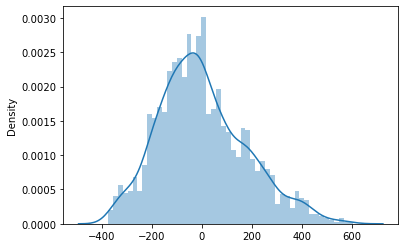

In [1068]:
import seaborn as sns
sns.distplot((y_test-predictions),bins=50)

# Support Vector Regression 

In [1069]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
predictions = svr.predict(X_test)

test_score = r2_score(y_test,predictions)

In [1070]:
print("The accuracy of testing dataset ",test_score*100)
print('MAE for testing set: {}'.format(mean_absolute_error(predictions,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(predictions,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(predictions,y_test))))


The accuracy of testing dataset  -0.9438975534890037
MAE for testing set: 153.28863217675595
MSE for testing set: 37683.56776540349
RMSE for testing set: 194.12255862058765


C:\Users\AMITHK\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

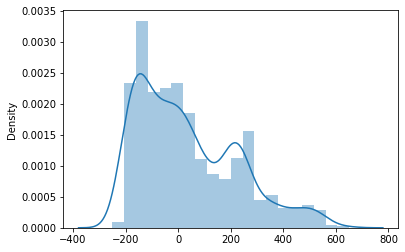

In [1071]:
sns.distplot((y_test-predictions),bins=20)

# Decision Tree Regressor

In [1072]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
dr.fit(X_train,y_train)
predictions = dr.predict(X_test)

test_score = r2_score(y_test,predictions)

In [1073]:
print("The accuracy of testing dataset ",test_score*100)
print('MAE for testing set: {}'.format(mean_absolute_error(predictions,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(predictions,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(predictions,y_test))))


The accuracy of testing dataset  -51.306506286968514
MAE for testing set: 173.4754025150837
MSE for testing set: 56484.533698435065
RMSE for testing set: 237.66475064349586


# Random Forest Regressor

In [1074]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
predictions = rf_model.predict(X_test)

test_score = rf_model.score(X_test,predictions)

In [1075]:
print("The accuracy of testing dataset ",test_score*100)
print('MAE for testing set: {}'.format(mean_absolute_error(predictions,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(predictions,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(predictions,y_test))))


The accuracy of testing dataset  100.0
MAE for testing set: 147.75789543726887
MSE for testing set: 38100.7434519394
RMSE for testing set: 195.19411735997426


C:\Users\AMITHK\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

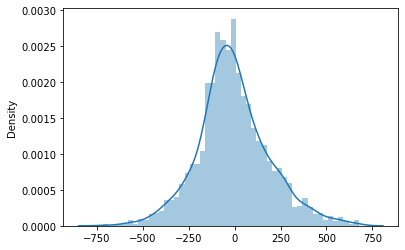

In [1076]:
sns.distplot((y_test-predictions),bins=50)

# Finding the best Parameters/

In [1077]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline


param_grid=[{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
            {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},]

forest_model = RandomForestRegressor()
# train across 5 folds , that's a total of (12+6)*5 = 90 rounds of training

grid_search = GridSearchCV(forest_model,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [1078]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [1079]:
from pickle import dump
model = grid_search.best_estimator_
dump(model,open('model.pkl','wb'))
model

RandomForestRegressor(max_features=6, n_estimators=30)

In [1080]:
df_train_new = df_train.drop(['Fees'],axis=1)
df_test = df_test.reindex(columns = df_train_new.columns, fill_value=0)

In [1081]:
df_test

,Experience,Rating,Qualification_BAMS,Qualification_BDS,Qualification_BHMS,Qualification_DHMS,Qualification_DNB,Qualification_Diploma,Qualification_GAMS,Qualification_GCEH,...,Place_Ernakulam,Place_Hyderabad,Place_Mumbai,Place_Thiruvananthapuram,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,35,50,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,31,50,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,40,70,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,50,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,16,100,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,10,50,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1983,4,50,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1984,9,50,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1985,12,98,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [1082]:
from pickle import load
model = load(open('model.pkl','rb'))
Doctor_average_fee = model.predict(df_test)
final_submission = pd.DataFrame(Doctor_average_fee)
final_submission.to_csv('final_submission.csv',index=False)